In [8]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt

In [21]:
x = []
y = []
x = [x/100 for x in range(-200,200)]
y = [(math.tanh(x)) for x in x]

Text(0, 0.5, 'y axis')

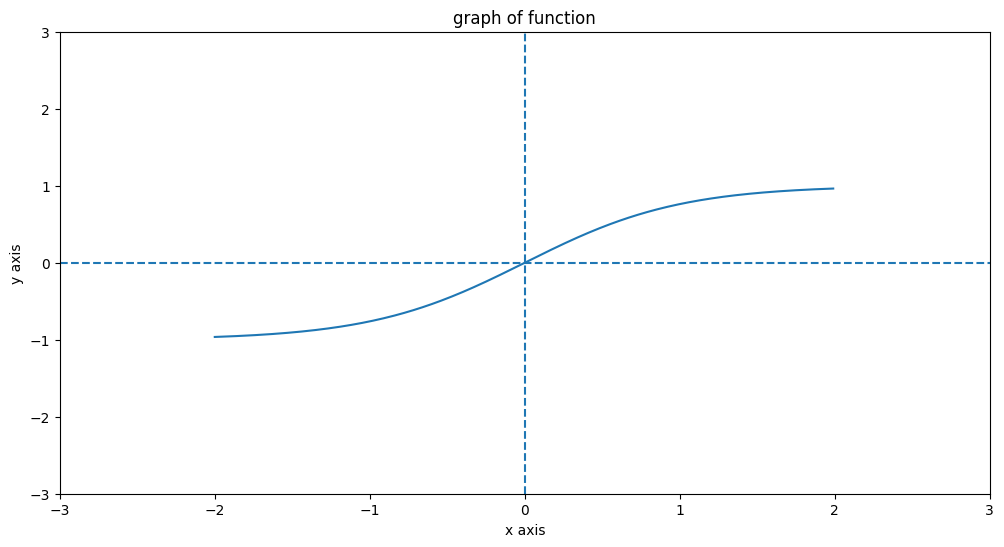

In [22]:
plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.hlines(0,-3,3, ls="--")
plt.vlines(0,-3,3, ls="--")

plt.title("graph of function")
plt.xlabel("x axis")
plt.ylabel("y axis")
#,loc="upper right")

# plt.annotate(
#             "this is origin", 
#             xy=(0,0), 
#             xytext=(3,-4), 
#             arrowprops=({
#                         "facecolor":"black",
#                         })
#             )


In [24]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [43]:
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Does color affect total?

In [48]:
target = "color"

df.color.value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [45]:
df.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [49]:
df[df[target] == "green"].describe()

,passengers,distance,fare,tip,tolls,total
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,1.248473,3.407281,14.040886,0.795458,0.275326,16.483615
std,0.857522,4.105122,12.790047,1.501194,1.388961,13.815712
min,0.000000,0.000000,2.500000,0.000000,0.000000,3.300000
25%,1.000000,1.012500,6.500000,0.000000,0.000000,8.300000
50%,1.000000,1.840000,9.500000,0.000000,0.000000,11.800000
75%,1.000000,3.940000,16.037500,1.260000,0.000000,19.300000
max,6.000000,33.460000,150.000000,10.710000,18.900000,169.700000


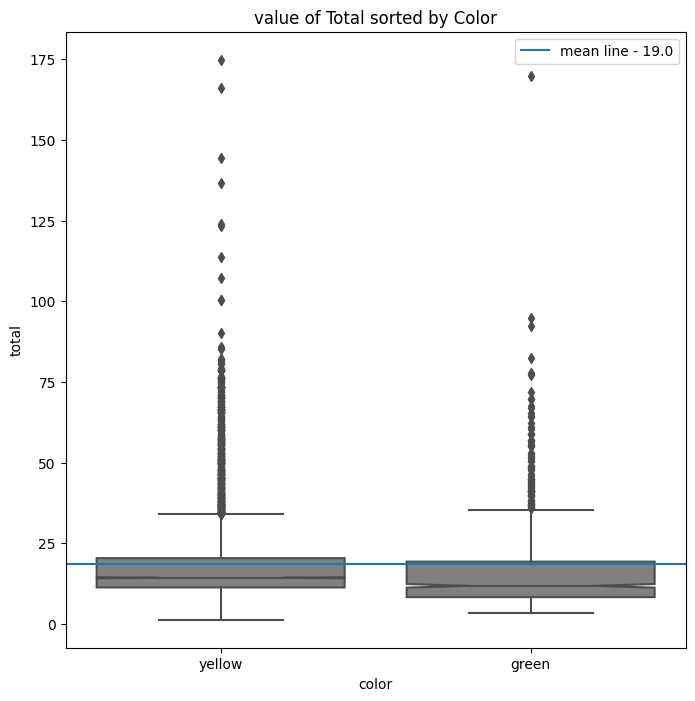

Text(0.5, 1.0, 'value of Total sorted by Color')

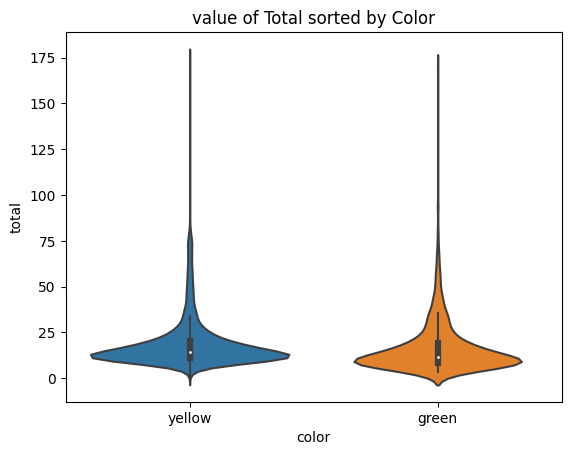

In [62]:
plt.figure(figsize=(8, 8))

i = 0
l = 0

sns.boxplot(x="color", 
            y="total", 
            data=df, 
            color ="grey",
            notch=True)
plt.axhline(df["total"].mean(),label=f"mean line - {round(df['total'].mean(),0)}")
plt.legend()
plt.title(f"value of Total sorted by Color")
plt.show()


sns.violinplot(x="color", y="total", data=df)
plt.title(f"value of Total sorted by Color")


In [99]:

def twosample_ttest(df=df,cat="color",target="total"):
    ''' 
    input not required due to tailored use
    does levene test and passes flag to 2sided 2sample ttest, prints out results and plots out a barchart of the class
    returns nothing
    '''
    ## does a levene test for comparing variance, creates a boolean flag that is passed into the ttest for
    ## comparing the Fraud monthly charge and the Not Fraud monthly charge
    ## then plots the graphs for a visual

    H0 = "Total is equal in regards to color"
    Ha = "Total is less than or greater depending on color"
    alpha = .05

    #compare variances to know how to run the test
    stat,pval = stats.levene(df[df[cat]=="yellow"][target],df[df[cat]=="green"][target])
    stat,pval
    if pval > 0.05:
        equal_var_flag = True
        print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
    else:
        equal_var_flag = False
        print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))

    #runs a two tailed sample to sample T-test 
    t, p = stats.ttest_ind( df[df[cat]=="green"][target], df[df[cat]=="yellow"][target], equal_var = equal_var_flag )

    #print line for result
    if p > alpha: #directionality, or if t is negative
        print("\n We fail to reject the null hypothesis (",(H0) , ")",'t=%.5f, p=%.5f' % (t,p))
    else:
         print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")",'t=%.5f, p=%.5f' % (t,p))

    #plots out a grouping of the features
    plt.ylabel("Density of those Total by Color")
    plt.yticks([],[])
    sns.distplot(df[df[cat] == "yellow"][target],color="yellow",label="yellow")
    sns.distplot(df[df[cat] == "green"][target],color="green",label="green")
    plt.axvline(df[df[cat] == "yellow"][target].mean(),color="yellow",ls=":",label="mean for yellow")
    plt.axvline(df[df[cat] == "green"][target].mean(),color="green",ls=":",label="mean for green")
    plt.xlabel("Total Charges")
    plt.xlim(0,50)
    plt.legend()
    plt.title("Total by Color")
    plt.show()


we can accept that there are equal variance in these two groups with 0.2 certainty Flag=T stat=1.66459, p=0.19703

 We reject the null Hypothesis ( T̶o̶t̶a̶l̶ ̶i̶s̶ ̶e̶q̶u̶a̶l̶ ̶i̶n̶ ̶r̶e̶g̶a̶r̶d̶s̶ ̶t̶o̶ ̶c̶o̶l̶o̶r̶ ) t=-5.02182, p=0.00000


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_27967/127801235.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[cat] == "yellow"][target],color="yellow",label="yellow")
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_27967/127801235.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

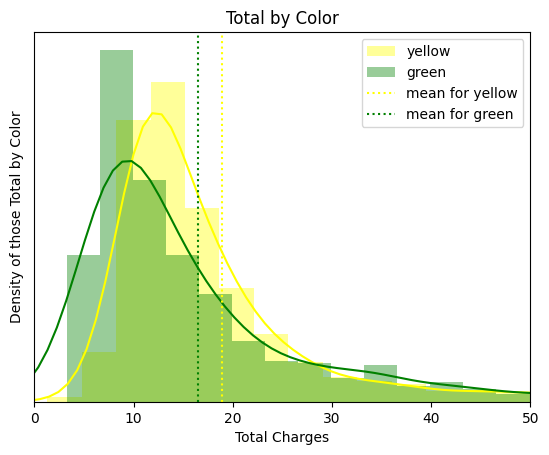

In [100]:
twosample_ttest()